In [38]:
import sys
sys.path.insert(0, '/Users/emilyw/College_Pt_2/S1/Big_Data_Analytics/Final_Proj/Test_Implementations/soccernet/tvcalib')

In [39]:
import json
import tracklab
from sn_gamestate.calibration.nbjw_calib import NBJW_Calib_Keypoints
from sn_gamestate.calibration.tvcalib import TVCalib_Segmentation, TVCalib

import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pprint

In [40]:
with open('data/SoccerNetGS/test/SNGS-116/Labels-GameState.json') as f:
    data = json.load(f)

notes_df = pd.DataFrame(data["annotations"])
notes_df1 = pd.json_normalize(notes_df['attributes'])
notes_df = pd.concat([notes_df, notes_df1], axis=1)
# display(notes_df1)

detections = notes_df[notes_df["image_id"] == '3116000001']
objects_img1 = detections[detections["supercategory"] == "object"]
display(objects_img1)
# display(objects_img1["bbox_image"])
print(list(objects_img1["bbox_image"]))
bbox_list = list(objects_img1["bbox_image"])
role_list = list(objects_img1["role"])
jersey_list = list(objects_img1["jersey"])
team_list = list(objects_img1["team"])
print(jersey_list)

,id,image_id,track_id,supercategory,category_id,attributes,bbox_image,bbox_pitch,bbox_pitch_raw,lines,role,jersey,team
0,3116000001,3116000001,1.0,object,1,"{'role': 'player', 'jersey': '4', 'team': 'left'}","{'x': 136, 'y': 520, 'x_center': 161.5, 'y_cen...","{'x_bottom_left': 29.248984434691206, 'y_botto...","{'x_bottom_left': 29.080245470992793, 'y_botto...",NaN,player,4,left
1,3116000002,3116000001,2.0,object,1,"{'role': 'player', 'jersey': '93', 'team': 'le...","{'x': 478, 'y': 565, 'x_center': 503.5, 'y_cen...","{'x_bottom_left': 30.48215393895095, 'y_bottom...","{'x_bottom_left': 30.46795200356605, 'y_bottom...",NaN,player,93,left
2,3116000003,3116000001,3.0,object,1,"{'role': 'player', 'jersey': '25', 'team': 'ri...","{'x': 565, 'y': 518, 'x_center': 589.0, 'y_cen...","{'x_bottom_left': 34.05922855899436, 'y_bottom...","{'x_bottom_left': 34.00504763725415, 'y_bottom...",NaN,player,25,right
3,3116000004,3116000001,4.0,object,3,"{'role': 'referee', 'jersey': None, 'team': None}","{'x': 468, 'y': 433, 'x_center': 491.0, 'y_cen...","{'x_bottom_left': 38.19082152471638, 'y_bottom...","{'x_bottom_left': 38.16749162328837, 'y_bottom...",NaN,referee,None,None
4,3116000005,3116000001,5.0,object,1,"{'role': 'player', 'jersey': None, 'team': 'le...","{'x': 557, 'y': 302, 'x_center': 574.0, 'y_cen...","{'x_bottom_left': 54.15617004388591, 'y_bottom...","{'x_bottom_left': 54.13456101330073, 'y_bottom...",NaN,player,None,left
5,3116000006,3116000001,6.0,object,1,"{'role': 'player', 'jersey': '11', 'team': 'le...","{'x': 935, 'y': 548, 'x_center': 964.5, 'y_cen...","{'x_bottom_left': 35.7854641078162, 'y_bottom_...","{'x_bottom_left': 35.570310875020816, 'y_botto...",NaN,player,11,left
6,3116000007,3116000001,7.0,object,1,"{'role': 'player', 'jersey': '34', 'team': 'ri...","{'x': 981, 'y': 541, 'x_center': 1015.5, 'y_ce...","{'x_bottom_left': 36.59722097273192, 'y_bottom...","{'x_bottom_left': 36.50599856298994, 'y_bottom...",NaN,player,34,right
7,3116000008,3116000001,8.0,object,1,"{'role': 'player', 'jersey': '44', 'team': 'le...","{'x': 1061, 'y': 488, 'x_center': 1081.0, 'y_c...","{'x_bottom_left': 41.323750892043826, 'y_botto...","{'x_bottom_left': 41.122472164276736, 'y_botto...",NaN,player,44,left
8,3116000009,3116000001,9.0,object,1,"{'role': 'player', 'jersey': '33', 'team': 'ri...","{'x': 1096, 'y': 487, 'x_center': 1128.0, 'y_c...","{'x_bottom_left': 41.7921043775938, 'y_bottom_...","{'x_bottom_left': 41.58060713820998, 'y_bottom...",NaN,player,33,right
9,3116000010,3116000001,10.0,object,1,"{'role': 'player', 'jersey': '20', 'team': 'ri...","{'x': 1288, 'y': 457, 'x_center': 1314.5, 'y_c...","{'x_bottom_left': 46.630270783992664, 'y_botto...","{'x_bottom_left': 46.57666616695442, 'y_bottom...",NaN,player,20,right


[{'x': 136, 'y': 520, 'x_center': 161.5, 'y_center': 587.5, 'w': 51, 'h': 135}, {'x': 478, 'y': 565, 'x_center': 503.5, 'y_center': 635.0, 'w': 51, 'h': 140}, {'x': 565, 'y': 518, 'x_center': 589.0, 'y_center': 580.0, 'w': 48, 'h': 124}, {'x': 468, 'y': 433, 'x_center': 491.0, 'y_center': 489.5, 'w': 46, 'h': 113}, {'x': 557, 'y': 302, 'x_center': 574.0, 'y_center': 344.0, 'w': 34, 'h': 84}, {'x': 935, 'y': 548, 'x_center': 964.5, 'y_center': 618.0, 'w': 59, 'h': 140}, {'x': 981, 'y': 541, 'x_center': 1015.5, 'y_center': 609.5, 'w': 69, 'h': 137}, {'x': 1061, 'y': 488, 'x_center': 1081.0, 'y_center': 549.0, 'w': 40, 'h': 122}, {'x': 1096, 'y': 487, 'x_center': 1128.0, 'y_center': 548.0, 'w': 64, 'h': 122}, {'x': 1288, 'y': 457, 'x_center': 1314.5, 'y_center': 513.5, 'w': 53, 'h': 113}, {'x': 1387, 'y': 432, 'x_center': 1403.0, 'y_center': 487.0, 'w': 32, 'h': 110}, {'x': 1419, 'y': 425, 'x_center': 1437.5, 'y_center': 477.5, 'w': 37, 'h': 105}, {'x': 1433, 'y': 452, 'x_center': 1465.5,

In [41]:
def convert_to_ltwh(bbox_dict):
    # Extract values from the dictionary
    x = bbox_dict['x']
    y = bbox_dict['y']
    x_center = bbox_dict['x_center']
    y_center = bbox_dict['y_center']
    w = bbox_dict['w']
    h = bbox_dict['h']
    
    # Calculate ltwh
    left = x_center - (w / 2)
    top = y_center - (h / 2)
    width = w
    height = h
    
    # Return the bbox in ltwh format (left, top, width, height)
    return [left, top, width, height]

# Example usage:
bbox_dict = {'x': 136, 'y': 520, 'x_center': 161.5, 'y_center': 587.5, 'w': 51, 'h': 135}
ltwh_bbox = convert_to_ltwh(bbox_dict)
# print(ltwh_bbox)

ltwh_list = [convert_to_ltwh(bbox) for bbox in bbox_list]
print(ltwh_list)


[[136.0, 520.0, 51, 135], [478.0, 565.0, 51, 140], [565.0, 518.0, 48, 124], [468.0, 433.0, 46, 113], [557.0, 302.0, 34, 84], [935.0, 548.0, 59, 140], [981.0, 541.0, 69, 137], [1061.0, 488.0, 40, 122], [1096.0, 487.0, 64, 122], [1288.0, 457.0, 53, 113], [1387.0, 432.0, 32, 110], [1419.0, 425.0, 37, 105], [1433.0, 452.0, 65, 107], [1461.0, 446.0, 33, 125], [1457.0, 446.0, 27, 109], [1479.0, 449.0, 29, 119], [1498.0, 444.0, 23, 122], [1511.0, 443.0, 42, 123], [1527.0, 444.0, 44, 114], [474.0, 381.0, 12, 11]]


In [42]:
# _target_: sn_gamestate.calibration.tvcalib.TVCalib_Segmentation
model_dir = "/Users/emilyw/College_Pt_2/S1/Big_Data_Analytics/Final_Proj/Test_Implementations/soccernet/sn-gamestate/pretrained_models"
checkpoint = model_dir + "/calibration/train_59.pt"
image_width = 1920
image_height = 1080
batch_size = 2

tracking_dataset = TVCalib_Segmentation(
    checkpoint=checkpoint,
    image_width=1920,
    image_height=1080,
    batch_size=1,
    device="cpu",
)

# Use the tracking_dataset object as needed
print(tracking_dataset)




In [43]:
curr_dir = "./data/SoccerNetGS/test/SNGS-116/"
image = cv2.imread(curr_dir + "/img1/000001.jpg")

In [44]:
# detections = pd.DataFrame({
#     'bbox_ltwh': [
#         [100, 200, 150, 250],  # Example bounding box: [left, top, right, bottom]
#         [120, 220, 170, 270],  # Another bounding box
#     ],
#     # Other columns like object class or confidence scores could go here.
# })

id = 3116000001
name = "SNGS-116"
detections = pd.DataFrame({
    'bbox_ltwh': ltwh_list,
    'image_id': [id for _ in range(len(ltwh_list))],
    'jersey': jersey_list,
    'role': role_list,
    'team': team_list
    # Other columns like object class or confidence scores could go here.
})

# detections = pd.DataFrame()
# detections = pd.DataFrame()

metadata = pd.DataFrame({
    'image_id': [id for _ in range(len(ltwh_list))],
    # 'image_id': [3116000001]
    # 'name': [name for _ in range(len(ltwh_list))],
}, )

# metadata = pd.DataFrame({
#     'keypoints': [
#         {'1': {'x': 150, 'y': 200}, '2': {'x': 160, 'y': 220}},  # Detected keypoints (index, x, y)
#         {'1': {'x': 120, 'y': 180}, '2': {'x': 130, 'y': 210}},  # Another set of keypoints
#     ],
#     # Additional metadata like image width, height, or timestamps could go here.
# })


img = tracking_dataset.preprocess(image, detections, metadata)
output = tracking_dataset.process(img, detections, metadata)

In [45]:
print(output[1])
# print(output)

                                                lines
0   {'Big rect. right main': [{'x': 0.050549450549...
1   {'Big rect. right main': [{'x': 0.050549450549...
2   {'Big rect. right main': [{'x': 0.050549450549...
3   {'Big rect. right main': [{'x': 0.050549450549...
4   {'Big rect. right main': [{'x': 0.050549450549...
5   {'Big rect. right main': [{'x': 0.050549450549...
6   {'Big rect. right main': [{'x': 0.050549450549...
7   {'Big rect. right main': [{'x': 0.050549450549...
8   {'Big rect. right main': [{'x': 0.050549450549...
9   {'Big rect. right main': [{'x': 0.050549450549...
10  {'Big rect. right main': [{'x': 0.050549450549...
11  {'Big rect. right main': [{'x': 0.050549450549...
12  {'Big rect. right main': [{'x': 0.050549450549...
13  {'Big rect. right main': [{'x': 0.050549450549...
14  {'Big rect. right main': [{'x': 0.050549450549...
15  {'Big rect. right main': [{'x': 0.050549450549...
16  {'Big rect. right main': [{'x': 0.050549450549...
17  {'Big rect. right main':

In [46]:
display(output[1])
pprint.pprint(output[1].iloc[0]["lines"])

,lines
0,{'Big rect. right main': [{'x': 0.050549450549...
1,{'Big rect. right main': [{'x': 0.050549450549...
2,{'Big rect. right main': [{'x': 0.050549450549...
3,{'Big rect. right main': [{'x': 0.050549450549...
4,{'Big rect. right main': [{'x': 0.050549450549...
5,{'Big rect. right main': [{'x': 0.050549450549...
6,{'Big rect. right main': [{'x': 0.050549450549...
7,{'Big rect. right main': [{'x': 0.050549450549...
8,{'Big rect. right main': [{'x': 0.050549450549...
9,{'Big rect. right main': [{'x': 0.050549450549...


{'Big rect. right main': [{'x': 0.05054945054945055, 'y': 0.46484375},
                          {'x': 0.26373626373626374, 'y': 0.546875},
                          {'x': 0.5032967032967033, 'y': 0.65234375},
                          {'x': 0.9912087912087912, 'y': 0.8125}],
 'Big rect. right top': [{'x': 0.45274725274725275, 'y': 0.41015625},
                         {'x': 0.3802197802197802, 'y': 0.39453125},
                         {'x': 0.2967032967032967, 'y': 0.4296875},
                         {'x': 0.08791208791208792, 'y': 0.453125}],
 'Circle right': [{'x': 0.23956043956043957, 'y': 0.5703125},
                  {'x': 0.2549450549450549, 'y': 0.6015625},
                  {'x': 0.2857142857142857, 'y': 0.6171875},
                  {'x': 0.3120879120879121, 'y': 0.62890625},
                  {'x': 0.3384615384615385, 'y': 0.6328125},
                  {'x': 0.3648351648351648, 'y': 0.640625},
                  {'x': 0.3934065934065934, 'y': 0.64453125},
                  

In [59]:
points_dict = output[1].iloc[0]["lines"]
pts = []
for a_dict in points_dict["Side line right"]:
    pts.append([a_dict['x'], a_dict['y']])


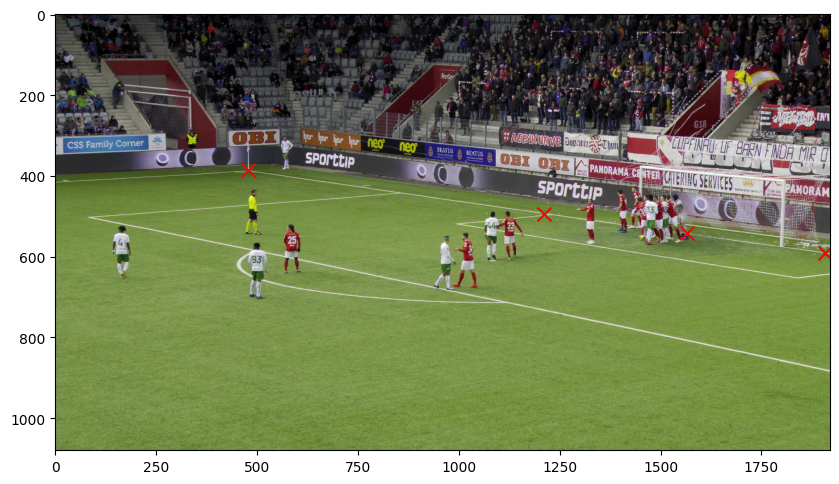

In [60]:
image = plt.imread(curr_dir + "/img1/000001.jpg")
plt.figure(figsize=(10, 6))  # Optional: Adjust the size of the image display
height, width = image.shape[:2]
pts = np.array(pts)

pixel_coords = pts * [width, height]

plt.imshow(image)
# plt.plot(640, 570, "og", markersize=10)  # og:shorthand for green circle
plt.scatter(pixel_coords[:, 0], pixel_coords[:, 1], marker="x", color="red", s=100)
plt.show()

# TVCalib

In [49]:
image_width = 1920
image_height = 1080
lens_dist = False
optim_steps = 2000
batch_size = 256
device = "cpu"

In [50]:
tvcal = TVCalib(image_width, image_height, lens_dist, optim_steps, batch_size, device)

In [51]:
print(output[1])

                                                lines
0   {'Big rect. right main': [{'x': 0.050549450549...
1   {'Big rect. right main': [{'x': 0.050549450549...
2   {'Big rect. right main': [{'x': 0.050549450549...
3   {'Big rect. right main': [{'x': 0.050549450549...
4   {'Big rect. right main': [{'x': 0.050549450549...
5   {'Big rect. right main': [{'x': 0.050549450549...
6   {'Big rect. right main': [{'x': 0.050549450549...
7   {'Big rect. right main': [{'x': 0.050549450549...
8   {'Big rect. right main': [{'x': 0.050549450549...
9   {'Big rect. right main': [{'x': 0.050549450549...
10  {'Big rect. right main': [{'x': 0.050549450549...
11  {'Big rect. right main': [{'x': 0.050549450549...
12  {'Big rect. right main': [{'x': 0.050549450549...
13  {'Big rect. right main': [{'x': 0.050549450549...
14  {'Big rect. right main': [{'x': 0.050549450549...
15  {'Big rect. right main': [{'x': 0.050549450549...
16  {'Big rect. right main': [{'x': 0.050549450549...
17  {'Big rect. right main':

In [52]:
per_samp_out = tvcal.preprocess(image, detections, output[1].iloc[0])
# print(per_samp_out)
print(per_samp_out["lines__ndc_projected_selection_shuffled"].shape)

torch.Size([1, 1, 3, 23, 4])


In [53]:
bbox_pitch, params = tvcal.process(per_samp_out, detections, metadata)

hi


In [54]:
# print(detections)

In [55]:
display(bbox_pitch)
print(bbox_pitch["bbox_pitch"].iloc[0])

,bbox_pitch,jersey_number,role,team
0,"{'x_bottom_left': 28.50037999346468, 'y_bottom...",4,player,left
1,"{'x_bottom_left': 30.00372225220646, 'y_bottom...",93,player,left
2,"{'x_bottom_left': 33.6414992361964, 'y_bottom_...",25,player,right
3,"{'x_bottom_left': 37.87802375226495, 'y_bottom...",None,referee,None
4,"{'x_bottom_left': 54.09616751196537, 'y_bottom...",None,player,left
5,"{'x_bottom_left': 35.294697935366095, 'y_botto...",11,player,left
6,"{'x_bottom_left': 36.253280233352584, 'y_botto...",34,player,right
7,"{'x_bottom_left': 40.94850974171925, 'y_bottom...",44,player,left
8,"{'x_bottom_left': 41.415003523982676, 'y_botto...",33,player,right
9,"{'x_bottom_left': 46.46289157108143, 'y_bottom...",20,player,right


{'x_bottom_left': 28.50037999346468, 'y_bottom_left': -4.529233797302386, 'x_bottom_right': 29.036232165837028, 'y_bottom_right': -4.124547718158236, 'x_bottom_middle': 28.76824436433647, 'y_bottom_middle': -4.326937366346696}


In [56]:
display(params)
print(params["parameters"].iloc[0])

,parameters
0,"{'pan_degrees': 39.21458755169342, 'tilt_degre..."
1,"{'pan_degrees': 39.21458755169342, 'tilt_degre..."
2,"{'pan_degrees': 39.21458755169342, 'tilt_degre..."
3,"{'pan_degrees': 39.21458755169342, 'tilt_degre..."
4,"{'pan_degrees': 39.21458755169342, 'tilt_degre..."
5,"{'pan_degrees': 39.21458755169342, 'tilt_degre..."
6,"{'pan_degrees': 39.21458755169342, 'tilt_degre..."
7,"{'pan_degrees': 39.21458755169342, 'tilt_degre..."
8,"{'pan_degrees': 39.21458755169342, 'tilt_degre..."
9,"{'pan_degrees': 39.21458755169342, 'tilt_degre..."


{'pan_degrees': 39.21458755169342, 'tilt_degrees': 82.48932816602967, 'roll_degrees': -0.34160312578438573, 'position_meters': [3.0506808757781982, 43.913414001464844, -8.672268867492676], 'x_focal_length': tensor(4097.8149), 'y_focal_length': tensor(4097.8149), 'principal_point': [tensor(960.), tensor(540.)], 'radial_distortion': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'tangential_distortion': [0.0, 0.0], 'thin_prism_distortion': [0.0, 0.0, 0.0, 0.0]}


In [70]:
# import sn_gamestate
# import cv2
# import sn_calibration_baseline
# import plugins.calibration.sn_calibration_baseline
# from sn_gamestate.visualization.pitch import draw_radar_view

# # from tracklab.utils.cv2 import cv2_load_image

# # image = cv2.imread(curr_dir + "/img1/000001.jpg")
# image = cv2.imread(curr_dir + "/img1/000001.jpg")
# patch = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.figure(figsize=(20, 6))  # Optional: Adjust the size of the image display
# plt.imshow(cv2.cvtColor(patch, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
# plt.axis('off')  # Hide axes
# plt.show()  #
# patch = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# detections = bbox_pitch
# display(bbox_pitch)
# # print(notes_merged.head(1))
# scale = 3

# draw_radar_view(patch, detections, scale, delta=32, group="predictions")

import sn_gamestate
import cv2
# import sn_calibration_baseline
# import plugins.calibration.sn_calibration_baseline
from sn_gamestate.visualization.pitch import draw_radar_view

# from tracklab.utils.cv2 import cv2_load_image

image = cv2.imread(curr_dir + "/img1/000001.jpg")
patch = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
detections = bbox_pitch
display(detections)
# print(notes_merged.head(1))
scale = 4

draw_radar_view(patch, detections, scale, delta=32, group="predictions")





,bbox_pitch,jersey_number,role,team
0,"{'x_bottom_left': 28.50037999346468, 'y_bottom...",4,player,left
1,"{'x_bottom_left': 30.00372225220646, 'y_bottom...",93,player,left
2,"{'x_bottom_left': 33.6414992361964, 'y_bottom_...",25,player,right
3,"{'x_bottom_left': 37.87802375226495, 'y_bottom...",None,referee,None
4,"{'x_bottom_left': 54.09616751196537, 'y_bottom...",None,player,left
5,"{'x_bottom_left': 35.294697935366095, 'y_botto...",11,player,left
6,"{'x_bottom_left': 36.253280233352584, 'y_botto...",34,player,right
7,"{'x_bottom_left': 40.94850974171925, 'y_bottom...",44,player,left
8,"{'x_bottom_left': 41.415003523982676, 'y_botto...",33,player,right
9,"{'x_bottom_left': 46.46289157108143, 'y_bottom...",20,player,right


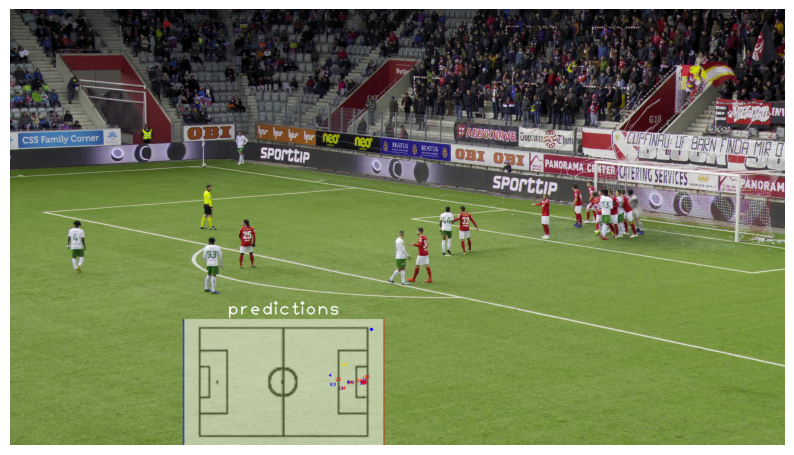

In [71]:
plt.figure(figsize=(10, 6))  # Optional: Adjust the size of the image display
# plt.imshow(cv2.cvtColor(patch, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.imshow(patch)

plt.axis('off')  # Hide axes
plt.show()  # Display the image in the notebook